In [19]:
# Loading all necessary libraries and packages

import numpy as np
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# DATA

Keras include sample datasets:
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews
    

In [20]:
# Loading train and test dataset from tsv files.

TrainDataset = pd.read_csv('train.tsv', sep='\t')
TestDataset = pd.read_csv('test.tsv', sep='\t')

In [21]:
# Displaying all Train Data column labels 
# to find the proper one.

TrainDataset.keys()

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [22]:
 # Displaying part of Train Data to see what's in.
    
TrainDataset['Phrase'][1100]

"Tartakovsky 's team has some freakish powers of visual charm , but the five writers slip into the modern rut of narrative banality"

In [23]:
# Checking the size of train dataset 
# to predict max words amount.

TrainDataset.shape

(156060, 4)

# Tokenize reviews

In [24]:
# Estimation of max words amount in one data cell.
NumberOfWords = 100

# Tokenize reviews.
tokenizer = Tokenizer(num_words = NumberOfWords, split=' ')
tokenizer.fit_on_texts(TrainDataset['Phrase'].values)

# Determination the representation of sentences as numerical.
train_data = tokenizer.texts_to_sequences(TrainDataset['Phrase'].values)
test_data = tokenizer.texts_to_sequences(TestDataset['Phrase'].values)

# Changing the shape of train and test datasets.
ReshapedTrainingDataset = pad_sequences(train_data)
ReshapedTestDataset = pad_sequences(test_data)

# Obtain one-hot encoding of class labels.
Sentiments = pd.get_dummies(TrainDataset['Sentiment']).values

# Naural Network model creation

In [25]:
# Model creation. Definition of basic assumptions of
# neural network : adagrad (back propagation algorithm),
# probability value as NN return value.
# Additionally - displaying the percent value of
# properly classiffied probes

model = Sequential()
model.add(Embedding(NumberOfWords, 64, input_length=30))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 64)            6400      
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 105,861
Trainable params: 105,861
Non-trainable params: 0
_________________________________________________________________


# Model training

In [29]:
# Model training in 6 epochs.

hist=model.fit(ReshapedTrainingDataset, Sentiments, epochs=6, batch_size=128, verbose=1)

Epoch 1/6
156060/156060 [==============================] - 195s 1ms/step - loss: 1.1776 - acc: 0.5375
Epoch 2/6
156060/156060 [==============================] - 220s 1ms/step - loss: 1.1767 - acc: 0.5375
Epoch 3/6
156060/156060 [==============================] - 269s 2ms/step - loss: 1.1760 - acc: 0.5384
Epoch 4/6
156060/156060 [==============================] - 260s 2ms/step - loss: 1.1756 - acc: 0.5389
Epoch 5/6
156060/156060 [==============================] - 237s 2ms/step - loss: 1.1746 - acc: 0.5382
Epoch 6/6
156060/156060 [==============================] - 306s 2ms/step - loss: 1.1740 - acc: 0.5387


# Results' vizualization

Quick visualization of model training history


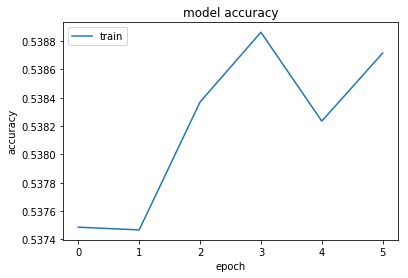

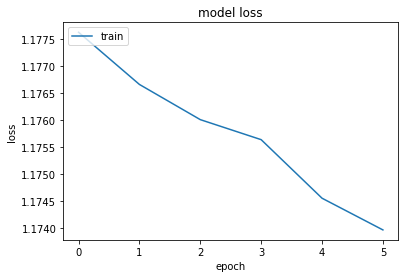

In [30]:
print('Quick visualization of model training history')
plt.plot(hist.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
FinalResult = model.evaluate(ReshapedTrainingDataset, Sentiments, verbose=1)
ResultOfRightCalssification = 100*FinalResult[1]
print('Result of right calssification (based on train dataset): %.4f%%' % ResultOfRightCalssification)

156060/156060 [==============================] - 74s 473us/step
Result of right calssification (based on train dataset): 53.8357%
